In [150]:
import pandas as pd
import matplotlib as plt


df = pd.read_csv("Simonelli dataset - Cleaned.csv")

#store the "first proposed date" as a date rather than a string
df['First_proposed_date'] = pd.to_datetime(df['First_proposed_date'])

### Defining functions

In [151]:
def Stats(name,df):

    median = df["Negotiation_length_days"].median()
    median = round(median)

    mean = df["Negotiation_length_days"].mean()
    mean = round(mean)
    
    std = df["Negotiation_length_days"].std()
    std = round(std)
    
    TenthPercentile = df["Negotiation_length_days"].quantile(q=0.1)
    TenthPercentile = round(TenthPercentile)
    
    count = df.shape[0]

    return(name, median, mean, std, TenthPercentile, count)

col_list = ['Name','Median', 'Mean', "Standard Deviation", "Tenth Percentile","Count"]

In [152]:
def Actors(df):

    df_NGO = df[(df['Proposer_type'] == 'NGO')]
    df_IGO = df[(df['Proposer_type'] == 'IGO')]
    df_single = df[(df['Proposer_type'] == 'single state')]
    df_multiple = df[(df['Proposer_type'].str.contains("multiple"))]
    df_joint = df[(df['Proposer_type'].str.contains("joint"))]
    #some treaties can go into multiple categories here
    #all treaties are in at least one category
    
    a = Stats("NGO",df_NGO)
    b = Stats("IGO",df_IGO)
    c = Stats("Single state",df_single)
    d = Stats("Multiple separate proposals",df_multiple)
    e = Stats("Joint proposal from multiple actors",df_joint)

    data = [a,b,c,d,e]
    output = pd.DataFrame(data, columns=col_list)
    return(output)

### Time for different kinds of treaty

In [153]:
#all treaties
a = Stats("Multilateral treaties from 1864",df)


#in total from 1945
df_post_45 = df[(df['First_proposed_date'] > "1945-01-01")]
b = Stats("Multilateral treaties after 1945",df_post_45)


#by security from 1864
df_not_security = df[(df['Non_security'] == 1)]
c = Stats("Multilateral non-security treaties from 1864",df_not_security)

df_security = df[(df['Non_security'] == 0)]
d = Stats("Multilateral security treaties from 1864",df_security)


#by security from 1945
df_45_not_security = df_post_45[(df_post_45['Non_security'] == 1)]
e = Stats("Multilateral non-security treaties from 1945",df_not_security)

df_45_security = df_post_45[(df_post_45['Non_security'] == 0)]
f = Stats("Multilateral security treaties from 1945",df_security)


#output
data = [a,b,c,d,e,f]

In [154]:
times = pd.DataFrame(data, columns=col_list)
times

,Name,Median,Mean,Standard Deviation,Tenth Percentile,Count
0,Multilateral treaties from 1864,592,900,1057,78,168
1,Multilateral treaties after 1945,759,1046,1029,262,127
2,Multilateral non-security treaties from 1864,660,900,943,144,81
3,Multilateral security treaties from 1864,531,900,1159,72,87
4,Multilateral non-security treaties from 1945,660,900,943,144,81
5,Multilateral security treaties from 1945,531,900,1159,72,87


### Time for post-1945 treaties by actor

In [155]:
Actors(df_post_45)

,Name,Median,Mean,Standard Deviation,Tenth Percentile,Count
0,NGO,1546,1662,761,839,12
1,IGO,564,919,860,180,52
2,Single state,742,1109,947,340,36
3,Multiple separate proposals,266,427,341,155,8
4,Joint proposal from multiple actors,714,1076,1591,366,20


### Time for post-1945 *security* treaty by actor

In [156]:
Actors(df_45_security)

,Name,Median,Mean,Standard Deviation,Tenth Percentile,Count
0,NGO,1204,1546,769,839,10
1,IGO,674,1161,1094,318,14
2,Single state,884,1265,1054,396,20
3,Multiple separate proposals,422,422,279,264,2
4,Joint proposal from multiple actors,620,1422,2325,401,9


### Time for post-1945 *not security* treaty by actor

In [157]:
Actors(df_45_not_security)

,Name,Median,Mean,Standard Deviation,Tenth Percentile,Count
0,NGO,2242,2242,499,1960,2
1,IGO,552,830,754,166,38
2,Single state,673,914,784,299,16
3,Multiple separate proposals,266,428,383,116,6
4,Joint proposal from multiple actors,730,793,535,325,11


### Time for post-1945 treaties, broken down by great power led

In [158]:
#proposed by great power related to security or not
df_great_power = df_post_45[(df_post_45['Majorpower_prop'] == 1)]
a1 = Stats("Great power led in general",df_great_power)

df_great_power_sec = df_great_power[(df_great_power['Non_security'] == 0)]
a2 = Stats("Great power led about security",df_great_power_sec)

df_great_power_not_sec = df_great_power[(df_great_power['Non_security'] == 1)]
a3 = Stats("Great power led not about security",df_great_power_not_sec)


#not proposed by great power
df_not_great_power = df_post_45[(df_post_45['Majorpower_prop'] == 0)]
b = Stats("NOT great power led",df_not_great_power)

times = pd.DataFrame((a1,a2,a3,b), columns=col_list)
times

#NB: These are all looking just from 1945

,Name,Median,Mean,Standard Deviation,Tenth Percentile,Count
0,Great power led in general,792,1174,1422,247,33
1,Great power led about security,759,1489,1770,407,19
2,Great power led not about security,802,747,546,134,14
3,NOT great power led,723,1001,856,274,94


In [159]:
def Histogram(df, title):
    hist = df["Negotiation_length_days"].hist(bins=60,xlabelsize=None)
    hist.set_title(title)
    hist.set_xlabel("Duration length (days)")
    hist.set_ylabel("Count")
    return(hist)

<AxesSubplot:title={'center':'Entire dataset'}, xlabel='Duration length (days)', ylabel='Count'>

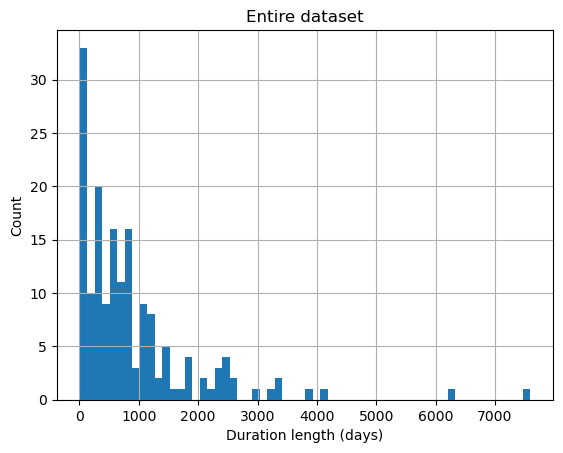

In [160]:
Histogram(df, "Entire dataset")

<AxesSubplot:title={'center':'All agreements after 1945'}, xlabel='Duration length (days)', ylabel='Count'>

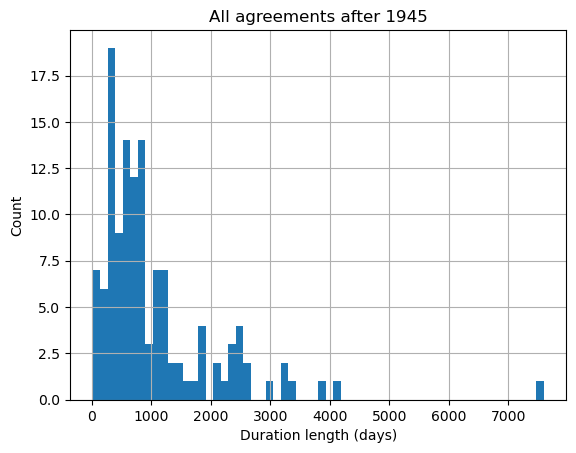

In [161]:
Histogram(df_post_45, "All agreements after 1945")

In [ ]:
def CIs(name,df):

    median = df["Negotiation_length_days"].median()
    median = round(median)

    mean = df["Negotiation_length_days"].mean()
    mean = round(mean)
    
    std = df["Negotiation_length_days"].std()
    std = round(std)
    
    TenthPercentile = df["Negotiation_length_days"].quantile(q=0.1)
    TenthPercentile = round(TenthPercentile)
    
    count = df.shape[0]

    return(name, median, mean, std, TenthPercentile, count)

col_list = ['Name','Median', 'Mean', "Standard Deviation", "Tenth Percentile","Count"]